In [3]:
import pandas as pd
e_Luminor = pd.read_pickle('Environmentresults/Luminor.pkl')
s_Luminor = pd.read_pickle('Socialresults/Luminor.pkl')
g_Luminor = pd.read_pickle('Governanceresults/Luminor.pkl')

In [8]:
g_Luminor

,Document no,Similarity score with query_G,Year,Most similar words
0,3,0.875716,luminor_bank_as_interim_report_q1_2020.txt,"audit, auditing, accounting, oversight, audito..."
1,8,0.863801,luminor_q2_2019_interim_report_eng.txt,"audit, auditors, auditing, accounting, auditor..."
2,4,0.861340,luminor_bank_as_interim_report_q2_2020.txt,"audit, auditors, auditing, accounting, oversig..."
3,5,0.850645,luminor_bank_as_interim_report_q3_2020.txt,"audit, accounting, oversight, commission, audi..."
4,6,0.846555,luminor_bank_as_interim_report_q4_2020.txt,"audit, accounting, oversight, commission, audi..."
5,2,0.792441,luminor-ee-4q-report-2018-en.txt,"audit, accounting, commission, disclosure, reg..."
6,10,0.780445,luminor_q4_2019_interim_report_en.txt,"accounting, reviewing, commission, review, dis..."
7,7,0.780367,luminor_q1_2019_interim_report_en.txt,"accounting, commission, review, disclosure, re..."
8,9,0.755285,luminor_q3_2019_interim_report_en.txt,"accounting, reviewing, commission, review, dis..."
9,1,0.715843,luminor-ee-3q-report-2018-en.txt,"accounting, commission, audited, disclosure, r..."


In [10]:
e_Luminor = e_Luminor.rename(columns={"Similarity score with query":"Similarity score with query_E","Document name":"Year"})
e_Luminor = e_Luminor.drop(columns=["Document no","Most similar words"])
s_Luminor = s_Luminor.rename(columns={"Similarity score with query":"Similarity score with query_S","Document name":"Year"})
s_Luminor = s_Luminor.drop(columns=["Document no","Most similar words"])
g_Luminor = g_Luminor.rename(columns={"Similarity score with query":"Similarity score with query_G","Document name":"Year"})
g_Luminor = g_Luminor.drop(columns=["Document no","Most similar words"])
s_Luminor


,Similarity score with query_S,Year
0,0.724868,luminor_bank_as_interim_report_q4_2020.txt
1,0.712235,luminor_bank_as_interim_report_q1_2020.txt
2,0.702376,luminor_bank_as_interim_report_q3_2020.txt
3,0.690629,luminor_q2_2019_interim_report_eng.txt
4,0.681038,luminor_bank_as_interim_report_q2_2020.txt
5,0.678521,luminor_q1_2019_interim_report_en.txt
6,0.668452,luminor_q3_2019_interim_report_en.txt
7,0.668242,luminor_q4_2019_interim_report_en.txt
8,0.624491,luminor-ee-3q-report-2018-en.txt
9,0.611732,luminor-ee-4q-report-2018-en.txt


In [12]:
dfs = [e_Luminor, s_Luminor, g_Luminor]
dfs = [df.set_index('Year') for df in dfs]
s = dfs[0].join(dfs[1:])
#s = s.drop(columns=['Most similar words in environment topic', 'Most similar words in social topic','Most similar words in governance topic','E_Index of document','S_Index of document','G_Index of document'])
s.mean()

Similarity score with query_E    0.515051
Similarity score with query_S    0.667601
Similarity score with query_G    0.798661
dtype: float64

In [13]:
s['Year_number'] = s.index.str.extract(r'(?<!\d)(\d{4})(?!\d)', expand=False)
s = s.sort_values(by='Year_number')
s

,Similarity score with query_E,Similarity score with query_S,Similarity score with query_G,Year_number
Year,,,,
luminor-ee-4q-report-2018-en.txt,0.514686,0.611732,0.792441,2018
luminor-ee-3q-report-2018-en.txt,0.499289,0.624491,0.715843,2018
luminor-ee-2q-report-2018-en.txt,0.398585,0.581026,0.662836,2018
luminor_q4_2019_interim_report_en.txt,0.552983,0.668242,0.780445,2019
luminor_q3_2019_interim_report_en.txt,0.549435,0.668452,0.755285,2019
luminor_q2_2019_interim_report_eng.txt,0.510690,0.690629,0.863801,2019
luminor_q1_2019_interim_report_en.txt,0.508860,0.678521,0.780367,2019
luminor_bank_as_interim_report_q4_2020.txt,0.549378,0.724868,0.846555,2020
luminor_bank_as_interim_report_q1_2020.txt,0.533469,0.712235,0.875716,2020


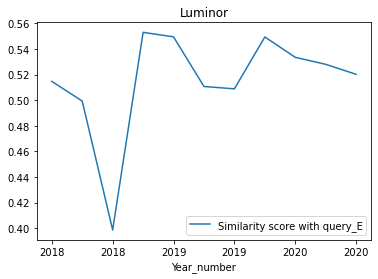

In [14]:
s.plot(x ='Year_number', y='Similarity score with query_E', kind = 'line',title = "Luminor")

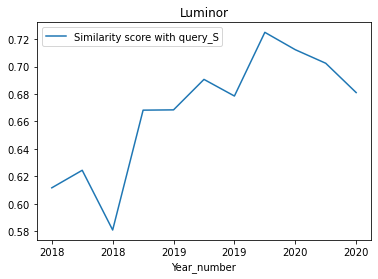

In [15]:
s.plot(x ='Year_number', y='Similarity score with query_S', kind = 'line',title = "Luminor")

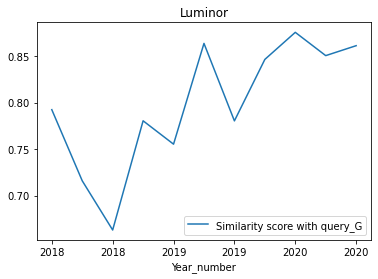

In [16]:
s.plot(x ='Year_number', y='Similarity score with query_G', kind = 'line',title = "Luminor")

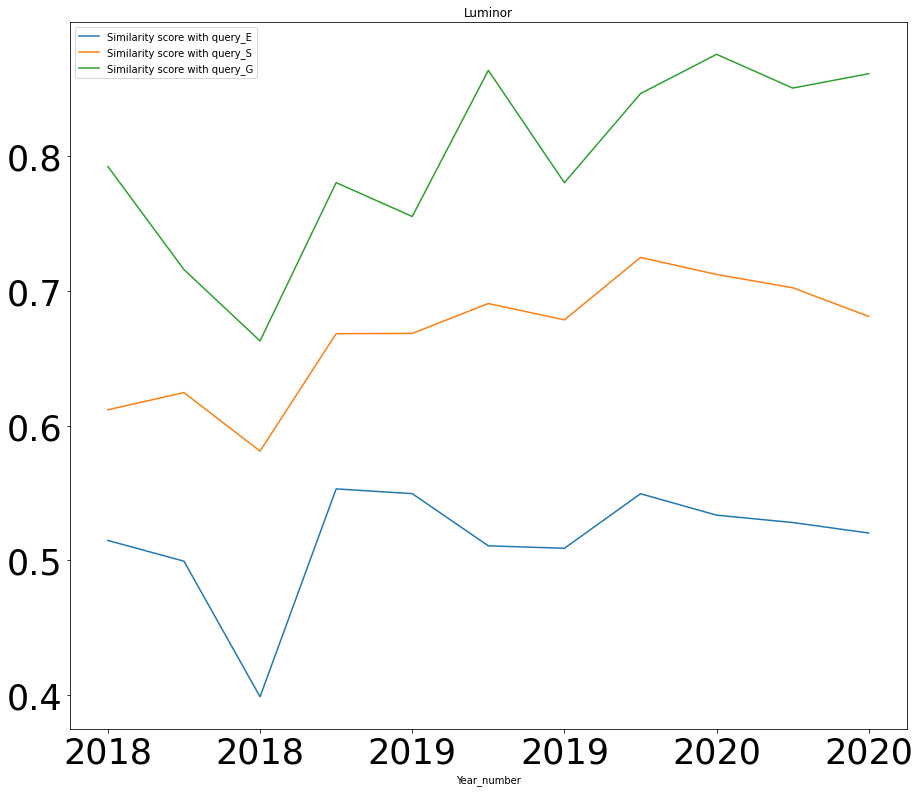

In [17]:
import pickle
ax1 = s.plot(x='Year_number',mark_right=False,figsize=(15,13), title = "Luminor",fontsize = 35) 
pickle.dump(ax1, open("luminorplot.pickle", "wb"))